# Destination Selection in Seattle, Washington.

A data-based approach using Seattle Airbnb Open Survey Data (Version 2).

This notebook explore analysis of Seattle Airbnb data in dicussing tourist activities.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Task 1 - What property types are most suitable for tourists?

In [3]:
# Read in data file
df = pd.read_csv('./listings.csv')

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
the_property =  df['property_type']
the_property.head()

0    Apartment
1    Apartment
2        House
3    Apartment
4        House
Name: property_type, dtype: object

In [5]:
nos_missing = pd.isnull(df['property_type']).sum()
nos_missing

1

In [6]:
remove_missing = df.dropna(subset=['property_type'], how='any')

remove_missing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [33]:
df['property_type'].describe()

count      3817
unique       16
top       House
freq       1733
Name: property_type, dtype: object

In [7]:
general_property =  df.property_type.value_counts()
general_property

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [8]:
(general_property/df.shape[0])

House              0.453903
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Chalet             0.000524
Dorm               0.000524
Yurt               0.000262
Name: property_type, dtype: float64

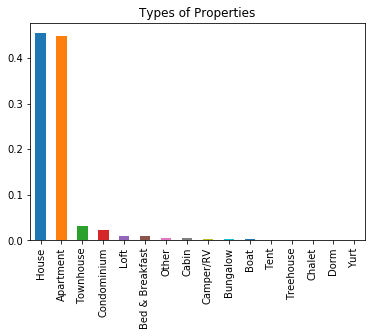

In [9]:
(general_property/df.shape[0]).plot(kind="bar")
plt.title("Types of Properties");

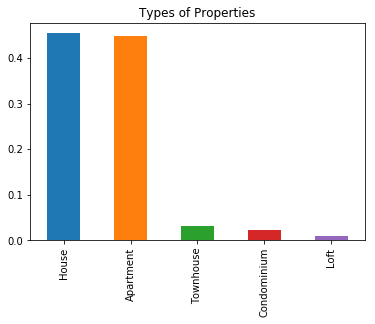

In [10]:
(general_property[:5]/df.shape[0]).plot(kind='bar')
plt.title("Types of Properties");

## Task 2 - Most Popular Destination in Seattle

In [11]:
gen =  df['neighbourhood']
gen.head()

0    Queen Anne
1    Queen Anne
2    Queen Anne
3    Queen Anne
4    Queen Anne
Name: neighbourhood, dtype: object

In [32]:
df['neighbourhood'].describe()

count             3402
unique              81
top       Capitol Hill
freq               351
Name: neighbourhood, dtype: object

In [14]:
gen1 =  df.neighbourhood.value_counts()
gen1.head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

In [45]:
gen1 =  df.neighbourhood.value_counts().dropna()
gen1.head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

In [46]:
(gen1/df.shape[0]).head()

Capitol Hill    0.091933
Ballard         0.055788
Belltown        0.053431
Minor           0.050288
Queen Anne      0.048979
Name: neighbourhood, dtype: float64

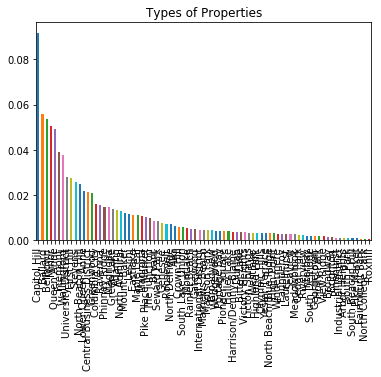

In [18]:
(gen1/df.shape[0]).plot(kind="bar")
plt.title("Types of Properties");

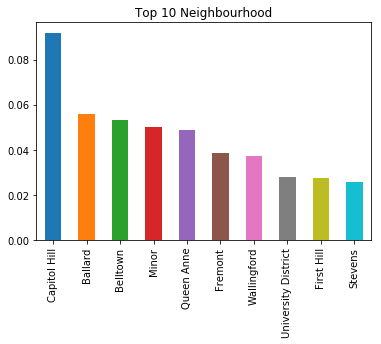

In [34]:
(gen1[:10]/df.shape[0]).plot(kind='bar')
plt.title("Top 10 Neighbourhood");

## Task 3 - Which neighbourhood would continue to record an increasing number of tourists?

In [23]:
data = df.groupby('neighbourhood')['number_of_reviews'].sum()
data.head()

neighbourhood
Alki              367
Arbor Heights      46
Atlantic         1149
Ballard          7110
Belltown         4332
Name: number_of_reviews, dtype: int64

In [24]:
data = df.groupby('neighbourhood', as_index=False).agg({"number_of_reviews": "sum"})
data.head()

,neighbourhood,number_of_reviews
0,Alki,367
1,Arbor Heights,46
2,Atlantic,1149
3,Ballard,7110
4,Belltown,4332


In [43]:
data = df.groupby('neighbourhood', as_index=True).agg({"review_scores_rating": "sum"}).dropna()
data = data.sort_values('review_scores_rating', ascending=False)
data.head()

,review_scores_rating
neighbourhood,
Capitol Hill,26863.0
Ballard,17455.0
Belltown,16988.0
Minor,16737.0
Queen Anne,15580.0


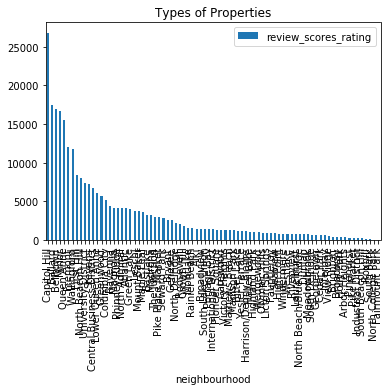

In [26]:
data.plot(kind="bar")
plt.title("Types of Properties");

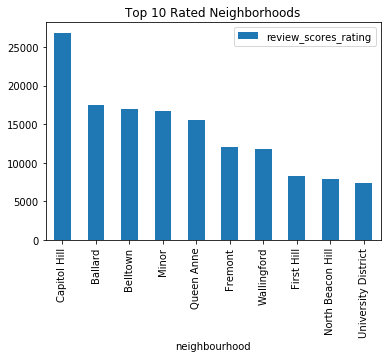

In [44]:
(data[:10]).plot(kind='bar')
plt.title("Top 10 Rated Neighborhoods");